In [0]:
!pip install pennylane-sf --upgrade
!pip install tensornetwork

In [0]:
import tensorflow as tf
import pennylane as qml

import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [0]:
dev = qml.device('default.qubit', wires=1)

def circuit(params, wires=0):
  qml.RX(params[0], wires=wires)
  qml.RY(params[1], wires=wires)

In [0]:
coeffs = [1, 1]
obs = [qml.PauliX(0), qml.PauliZ(0)]

H = qml.Hamiltonian(coeffs, obs)
qnodes = qml.map(circuit, obs, dev, measure='expval')
cost_fn  = qml.dot(coeffs, qnodes)

init_params = np.random.uniform(low=0, high=2*np.pi, size=2)

In [0]:
step_size = 0.01
max_iterations = 500
conv_tol = 1e-06
print_freq = 20

In [0]:
params = init_params
prev_energy = cost_fn(params)
qng_energies_block = []
all_params = []

for n in range(max_iterations):
    
    grad_cost = qml.grad(cost_fn, argnum=[0])
    grad_at_point = [float(i) for i in grad_cost(params)[0]] 
    
    params = params - step_size * np.dot(
                np.linalg.pinv(qnodes[0].metric_tensor([params])), 
                grad_at_point)
    
    all_params.append(params)

    energy = cost_fn(params)
    qng_energies_block.append(energy)
    
    conv = np.abs(energy - prev_energy)

    if n % print_freq == 0:
        print('Iteration = {:}'.format(n) ,'Energy = {:.8f} Ha,'.format(energy), 'Convergence parameter = {'
              ':.8f} Ha'.format(conv), "Params", params)

    if conv <= conv_tol:
        qng_block_steps = n
        break

    prev_energy = energy

    final_params = params

print()
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print()
print('Final params', final_params)
print()
print('Number of iterations = ', n)

Iteration = 0 Energy = -0.47880967 Ha, Convergence parameter = 0.07351730 Ha Params [4.01693157 6.05450992]
Iteration = 20 Energy = -1.28328777 Ha, Convergence parameter = 0.01531066 Ha Params [3.49651903 6.81388225]
Iteration = 40 Energy = -1.40089128 Ha, Convergence parameter = 0.00163652 Ha Params [3.25524387 6.99125703]
Iteration = 60 Energy = -1.41291068 Ha, Convergence parameter = 0.00016084 Ha Params [3.17714587 7.04451991]
Iteration = 80 Energy = -1.41408665 Ha, Convergence parameter = 0.00001568 Ha Params [3.15268933 7.06107671]
Iteration = 100 Energy = -1.41420120 Ha, Convergence parameter = 0.00000153 Ha Params [3.14505532 7.06624114]

Final value of the ground-state energy = -1.41420581 Ha

Final params [3.1445003  7.06661659]

Number of iterations =  104


In [0]:
lst = np.array(all_params)
param_1_list = lst[:,0]
param_2_list = lst[:,1]

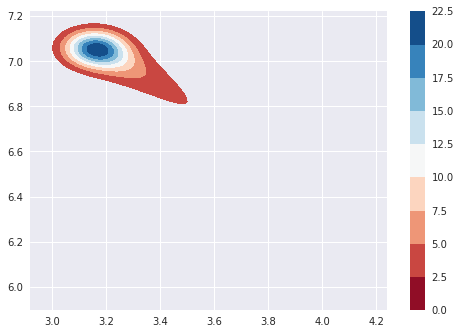

In [38]:
import seaborn as sns

# Basic 2D density plot
sns.set_style("darkgrid")
ax = sns.kdeplot(param_1_list, param_2_list, 
            cmap="RdBu", shade=True, shade_lowest=False, cbar = True)

In [0]:
plt.style.use("seaborn")
fontsize = 18

n = len(param_1_list)
ntheta_first, ntheta_second = (n, n)

theta_first = param_1_list
theta_second = param_2_list
theta_firstv, theta_secondv = np.meshgrid(theta_first, theta_second, indexing='ij')

In [0]:
#f = lambda x, y: cost_fn

In [0]:
#fn_values = np.zeros((ntheta_first, ntheta_second))

#for i in range(ntheta_first):
    #for j in range(ntheta_second):
        #fn_values[i, j] = f(theta_firstv[i,j], theta_secondv[i,j])

In [36]:
# Function values 
fn_values = []

for i in range (len(param_1_list)):
  values = (param_1_list[i], param_2_list[i])
  fn_values.append(values)

print(fn_values)

[(4.016931574722159, 6.054509924848165), (3.9939822878995925, 6.129464591296793), (3.968834142006812, 6.198826399819732), (3.9419769738297794, 6.262687458386036), (3.913866400685115, 6.321288318683231), (3.8849128059162537, 6.374961110290382), (3.855476451742138, 6.424084332543756), (3.8258669500127027, 6.4690501559509), (3.796345518802762, 6.5102427186919245), (3.7671288155674905, 6.548025020617506), (3.7383935039515626, 6.582732009152465), (3.7102810111398234, 6.614667836733865), (3.682902151030687, 6.64410575579755), (3.65634143582431, 6.67128956328234), (3.630660992417228, 6.696435862326792), (3.6059040568462155, 6.719736670571709), (3.5820980527835773, 6.741362086934451), (3.5592572777746154, 6.761462850826676), (3.5373852294716377, 6.780172706717821), (3.5164766073159046, 6.797610536257118), (3.496519025255551, 6.813882249784846), (3.477494469549213, 6.829082445928094), (3.459380533311289, 6.84329585678473), (3.4421514566843974, 6.856598600054997), (3.4257789986544513, 6.86905926

TypeError: ignored

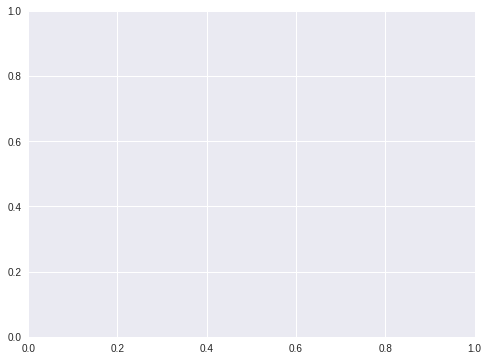

In [37]:
plt.style.use("seaborn")
fontsize = 18

fig, axes = plt.subplots(figsize=(8, 6))
cmap = plt.cm.get_cmap("RdBu")
contour_plot = plt.contourf(theta_first, theta_second, fn_values, 
                            extend='both', cmap=cmap)
cbar = plt.colorbar(contour_plot,)
cbar.ax.set_ylabel("Function value")

axes.set_xticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
axes.set_yticks([0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])

axes.set_xticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"], fontsize=fontsize)
axes.set_yticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"], fontsize=fontsize)
plt.xlabel(r'$\theta_1$', fontsize=fontsize)        
plt.ylabel(r'$\theta_2$', fontsize=fontsize)        

axes.set_aspect('equal')

plt.tight_layout()